- na straně 150
- hodně pomalý, speciálně kvůli hledání minima v celé matici
- jinak se taky nazývá alglomerativní metoda

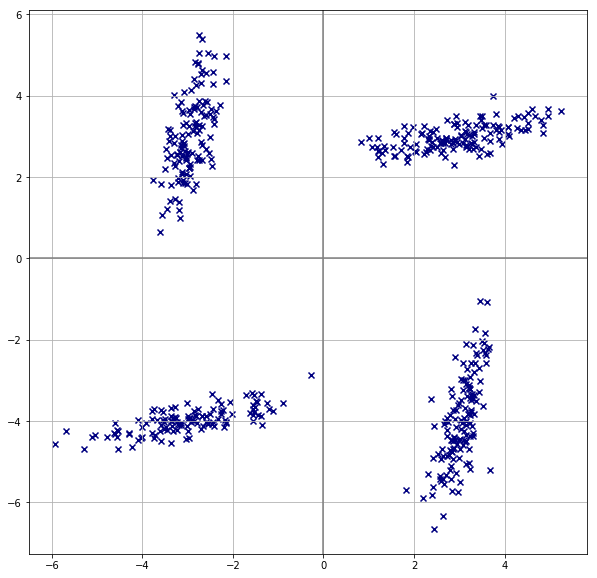

In [14]:
#počítám jen s dvojrozměrnýma datama

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

data = np.genfromtxt('data2.txt', delimiter=' ')
data_len = len(data)

plt.scatter(data[:,0],data[:,1], color='navy', marker='x')
plt.grid(True, which='both')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')

h = np.full([data_len-1], np.nan)

In [15]:
# prvotní výpočet matice vzdáleností
#def metric(x1,x2):
#    return np.abs(x1[0]-x2[0])**2+np.abs(x1[1]-x2[1])**2

dist_matrix = np.full((data_len,data_len),np.nan)

for i in range(0,data_len):
   dist_matrix[i,:] = np.sum((data-data[i,:])**2, axis=1)

np.fill_diagonal(dist_matrix, np.nan)

for i in range(0,data_len-1):

    ####nahrazení nul nekonečnem (kvůli hledání minima)
    #dist_matrix[dist_matrix==0] = np.nan
    
    #zkouška s maskou, ale je to pořád pomalý
    #mask = np.ones(dist_matrix.shape, dtype=bool)
    #np.fill_diagonal(mask, 0)
    #max_value = a[mask].max()
    #%time min_ind = np.unravel_index(np.argmin(dist_matrix[mask], axis=None), dist_matrix.shape)




    #### nalezení těch, co k sobě mají nejblíže

    min_ind = np.unravel_index(np.nanargmin(dist_matrix, axis=None), dist_matrix.shape)

    h[i] = dist_matrix[min_ind[0],min_ind[1]]

    #### dist_matrix - spojení těch co k sobě mají nejblíže
    #dist_matrix[dist_matrix==np.inf] = 0

    item1_dist_v = dist_matrix[:,min_ind[0]]
    item2_dist_v = dist_matrix[:,min_ind[1]]

    new_dist_v = np.minimum(item1_dist_v, item2_dist_v)

    #do sloupce a řádku prvního prvku vložím novy distanční vektor
    dist_matrix[:,min_ind[0]] = np.transpose(new_dist_v)
    dist_matrix[min_ind[0],:] = new_dist_v


    #smazání sloupce a řádku s druhým prvkem
    #!!!!! co kdybych místo mazání jen do sloupce/řádku dal nějaký velký/malý číslo
    dist_matrix[min_ind[1],:] = np.inf
    dist_matrix[:,min_ind[1]] = np.inf    
    #dist_matrix = np.delete(dist_matrix, min_ind[1], 1)
    #dist_matrix = np.delete(dist_matrix, min_ind[1], 0)


In [20]:

h_dist = np.floor(np.log10(np.ediff1d(h))).astype(int)
cl_nb = len(h_dist[h_dist>=0])+1 #+1 protože top číslo je vzdálenost 2 tříd, všechny nižší jednu přidávaj
print(h_dist)
print(cl_nb)



[-5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -6 -6 -5 -5 -5 -5 -5 -4 -5 -6 -4 -5 -4
 -5 -6 -6 -5 -5 -5 -5 -5 -5 -6 -5 -5 -6 -5 -5 -5 -5 -6 -6 -5 -5 -6 -5 -6
 -5 -5 -6 -5 -5 -6 -5 -5 -6 -5 -5 -5 -6 -7 -6 -5 -5 -6 -5 -6 -4 -5 -5 -6
 -6 -6 -5 -6 -5 -5 -5 -5 -5 -6 -5 -5 -5 -5 -5 -5 -5 -5 -6 -5 -5 -5 -4 -5
 -6 -6 -5 -8 -5 -6 -5 -5 -5 -4 -4 -5 -6 -5 -5 -5 -6 -5 -5 -5 -5 -5 -5 -5
 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -6 -5 -6 -4 -5 -5 -5 -4 -5 -6 -5
 -4 -5 -6 -5 -5 -7 -5 -5 -5 -4 -6 -5 -6 -4 -5 -4 -4 -7 -5 -6 -7 -5 -5 -5
 -6 -5 -6 -5 -5 -5 -6 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -4 -5 -5 -5 -6 -5
 -5 -5 -4 -6 -6 -5 -5 -5 -6 -5 -6 -5 -6 -5 -5 -5 -5 -5 -5 -5 -6 -5 -5 -5
 -5 -5 -5 -5 -6 -5 -4 -4 -5 -6 -5 -4 -4 -5 -4 -5 -5 -5 -5 -5 -5 -4 -5 -4
 -4 -5 -5 -5 -4 -6 -5 -5 -5 -5 -4 -6 -5 -5 -5 -5 -5 -4 -5 -5 -4 -7 -6 -5
 -5 -5 -5 -4 -5 -4 -4 -5 -5 -5 -5 -4 -4 -5 -5 -4 -5 -6 -4 -4 -5 -6 -4 -4
 -5 -5 -4 -4 -5 -5 -4 -5 -5 -6 -4 -5 -4 -5 -5 -5 -4 -5 -5 -5 -4 -4 -5 -5
 -4 -5 -5 -4 -4 -4 -4 -5 -4 -4 -5 -6 -5 -4 -5 -5 -5

In [7]:
data_len

30

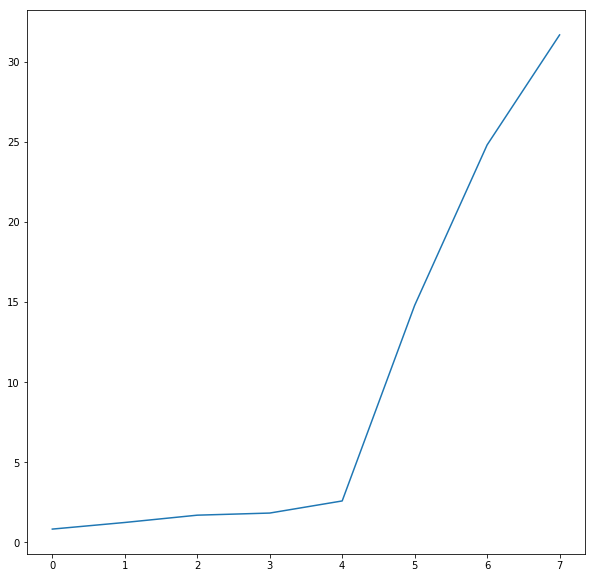

In [8]:
plt.plot(h[-8:])

In [18]:
a = np.mean(h)
print(a)
a_max = a + a/2.
print(a_max)
h[h>a_max]


0.07921966503534343
0.11882949755301514


array([ 0.12584469,  0.13121724,  0.13304916,  0.15173894,  0.16048924,
        0.16691159,  0.17772798,  0.19934192,  0.20847212,  0.22045249,
        0.33544897,  0.3365837 ,  0.49113599,  0.85473823,  7.40598808,
       10.50253112, 11.5961969 ])

In [36]:
a = np.array([0, 1, 2, np.inf])
print(np.argmin(a))

0
